In my 002jupyter notebook on gender tipping, http://bit.ly/2pPOkV6 ,  I end the notebook with descriptive statistics, means and standard deviations. 

This gif compelled me to come back and create simple visualizations: https://www.autodeskresearch.com/publications/samestats
instead of just leaving it to descriptive statistics which may not tell the whole story.

So I decided to make some quick scatter plots on the 7 buckets I defined at the end of 002 pizza delivery notebook. I won't add much analysis for now but I plan on revisiting this in the future.

In [59]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

data = pd.read_csv(r'C:\Users\angel\OneDrive\Documents\data_training\data\RawDelData.csv')
ylabel = 'Order Amount'
xlabel = 'Tip in $'

In [60]:
#Creating a function so I don't have to duplicate code
def create_scatter(df, title_name):
    pl.scatter(df.Tip, df.OrderAmount)
    
    n = len(df)
    pl.title('n = %s' %n, fontsize=22)
    pl.suptitle(title_name, fontsize=22)
    
    pl.ylabel(ylabel, fontsize=18)
    pl.xlabel(xlabel, fontsize=18)
    pl.xlim(-0.25, 15) #The right bound excludes outliers in the visualization but not the sample count
    pl.ylim(-0.30, 80) #DITTO the comment above
    
    pl.rcParams['figure.figsize'] = (15, 10)
    
    pl.show()

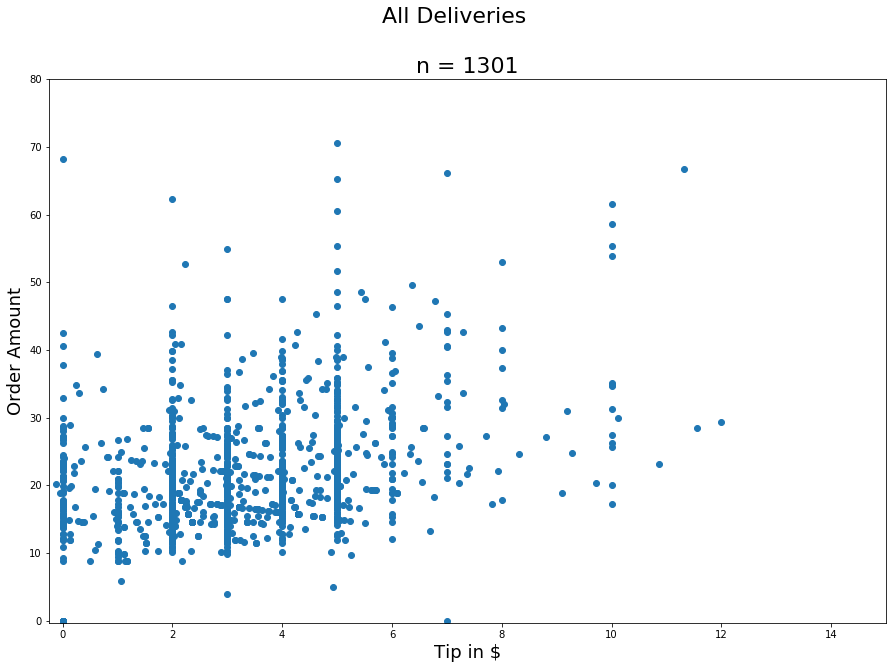

In [68]:
create_scatter(data, 'All Deliveries')

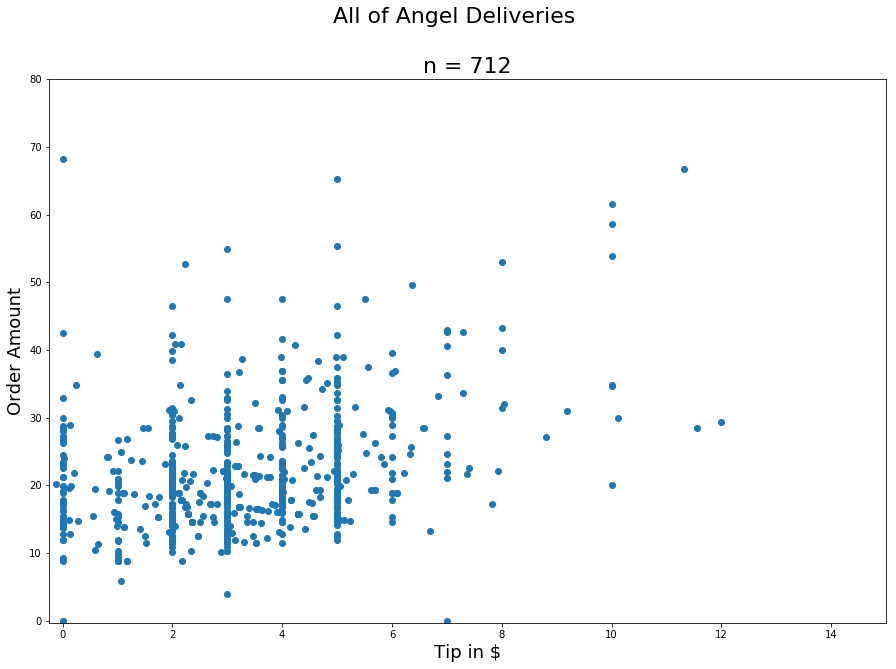

In [62]:
angel_tip = data.loc[data['PersonWhoDelivered']=='Angel']
create_scatter(angel_tip, 'All of Angel Deliveries')

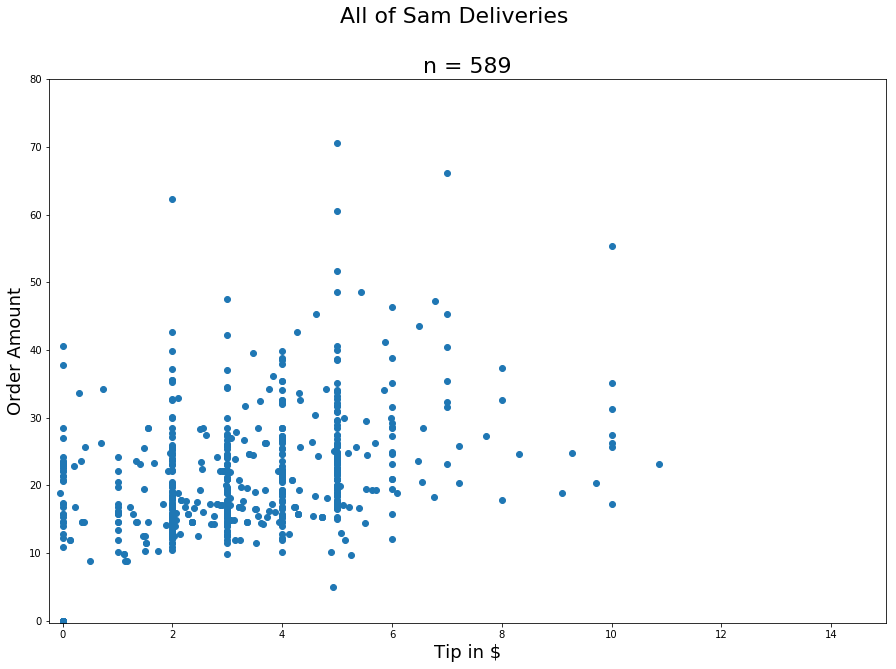

In [63]:
sam_tip = data.loc[data['PersonWhoDelivered']=='Sammie']
create_scatter(sam_tip, 'All of Sam Deliveries')

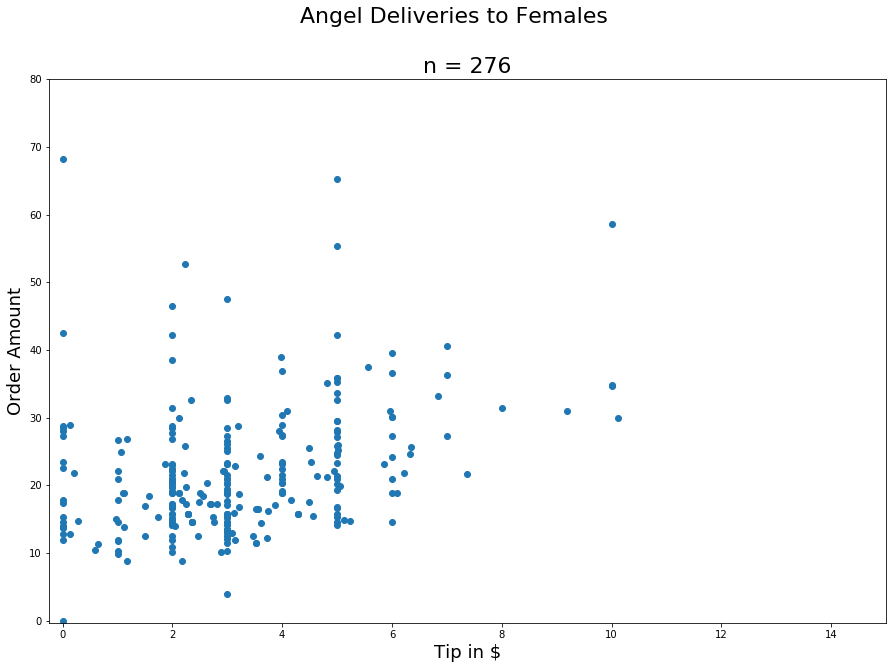

In [64]:
angel_female = angel_tip.loc[angel_tip['GenderOfTipper'] == 'Female']
create_scatter(angel_female, 'Angel Deliveries to Females')

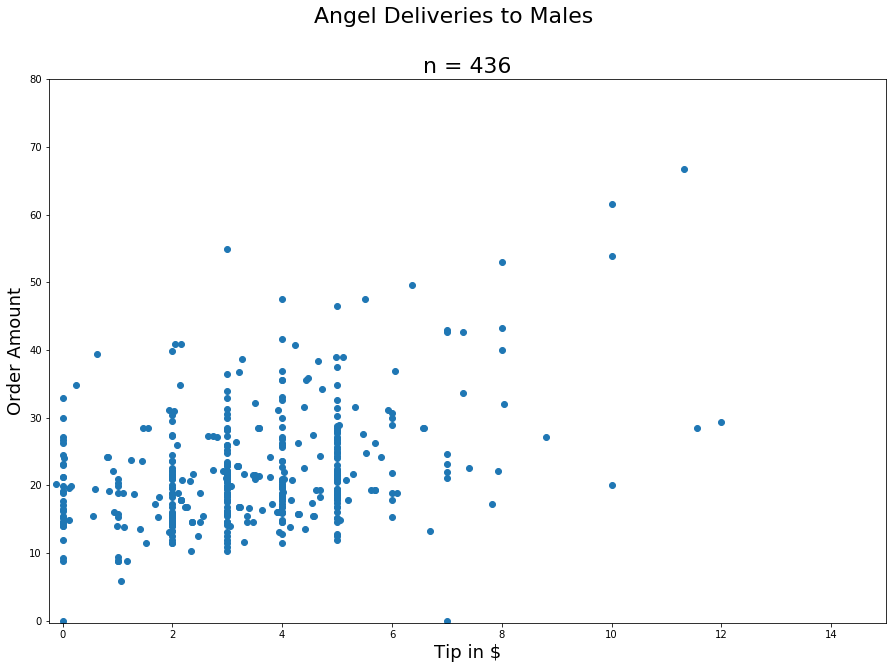

In [65]:
angel_male = angel_tip.loc[angel_tip['GenderOfTipper'] == 'Male']
create_scatter(angel_male, 'Angel Deliveries to Males')

#There is an excluded outlier in this data. A $25 tip from a very drunk man. I excluded it from the
#scatter plot so that all of the x axes could be the same

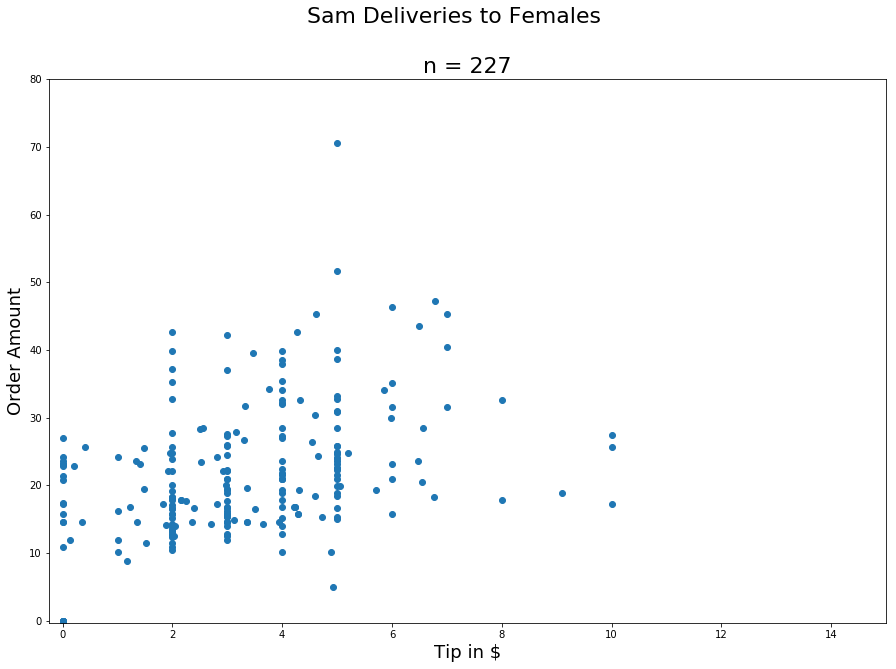

In [66]:
sam_female = sam_tip.loc[sam_tip['GenderOfTipper'] == 'Female']
create_scatter(sam_female, 'Sam Deliveries to Females')

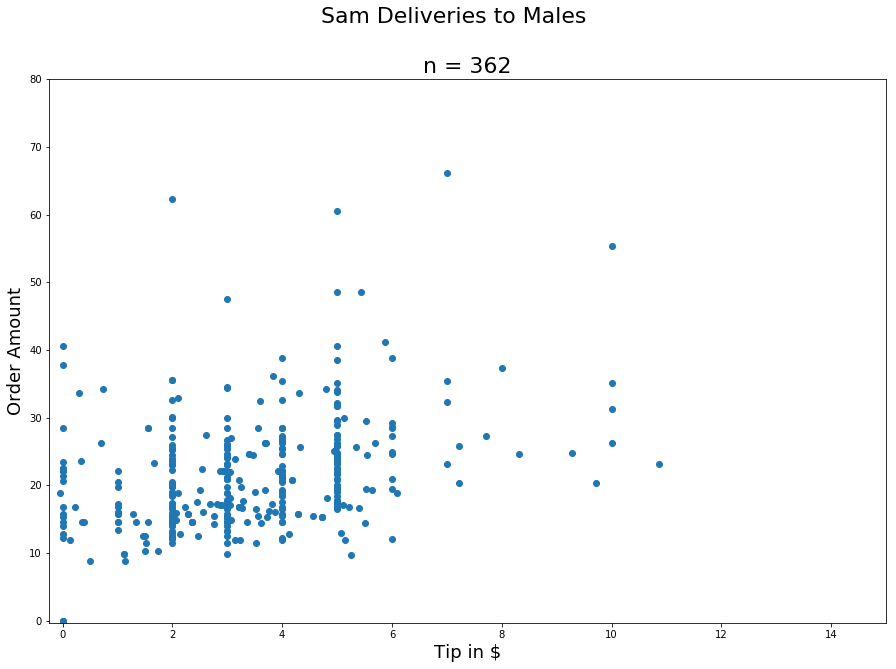

In [67]:
sam_male = sam_tip.loc[sam_tip['GenderOfTipper'] == 'Male']
create_scatter(sam_male, 'Sam Deliveries to Males')